# Coleta de dados

In [46]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
# nltk.download_gui()

In [27]:
reviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")

# Pré-Processamento dos Dados

## Definindo Tipos

In [28]:
reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [30]:
reviews["review_id"] = reviews["review_id"].astype("category")
reviews["order_id"] = reviews["order_id"].astype("category")
reviews["review_comment_title"] = reviews["review_comment_title"].astype("category")
reviews["review_comment_message"] = reviews["review_comment_message"].astype("category")
reviews["review_creation_date"] = pd.to_datetime(reviews["review_creation_date"],format="%Y/%m/%d %H:%M:%S")
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"],format="%Y/%m/%d %H:%M:%S")
reviews.dtypes

review_id                        category
order_id                         category
review_score                        int64
review_comment_title             category
review_comment_message           category
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [31]:
reviews.shape

(99224, 7)

In [32]:
def not_empty(s):
  return len(s) > 1

In [33]:
reviews["order_id"].duplicated().value_counts()

False    98673
True       551
Name: order_id, dtype: int64

In [34]:
def re_estrtura_nota(valor):
  if valor >= 5: 
    # positivo
    return 1
    # return 2
  elif valor > 2:
    # neutro
    return 0
  else:
    # negativo
    return -1
reviews = reviews[reviews["review_comment_message"].notna()]
reviews = reviews[reviews["review_comment_message"].apply(not_empty)]
reviews = reviews[["order_id", "review_id", "review_score", "review_comment_message"]]
reviews["order_id"].drop_duplicates(inplace=True)
reviews["review_score"] = reviews["review_score"].apply(re_estrtura_nota)
reviews

,order_id,review_id,review_score,review_comment_message
3,658677c97b385a9be170737859d3511b,e64fb393e7b32834bb789ff8bb30750e,1,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,f7c4243c7fe1938f181bec41a392bdeb,1,Parabéns lojas lannister adorei comprar pela I...
9,b9bf720beb4ab3728760088589c62129,8670d52e15e00043ae7de4c01cc2fe06,0,aparelho eficiente. no site a marca do aparelh...
12,9d6f15f95d01e79bd1349cc208361f09,4b49719c8a200003f700d3d986ea1a19,0,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,e51478e7e277a83743b6f9991dbfa3fb,3948b09f7c818e2d86c9a546758b2335,1,"Vendedor confiável, produto ok e entrega antes..."
...,...,...,...,...
99205,d398e9c82363c12527f71801bf0e6100,98fffa80dc9acbde7388bef1600f3b15,0,para este produto recebi de acordo com a compr...
99208,509b86c65fe4e2ad5b96408cfef9755e,df5fae90e85354241d5d64a8955b2b09,1,Entregou dentro do prazo. O produto chegou em ...
99215,d5cb12269711bd1eaf7eed8fd32a7c95,a709d176f59bc3af77f4149c96bae357,0,"O produto não foi enviado com NF, não existe v..."
99221,55d4004744368f5571d1f590031933e4,b3de70c89b1510c4cd3d0649fd302472,1,"Excelente mochila, entrega super rápida. Super..."


In [35]:
reviews.to_csv("datasets/reviews.csv")

In [44]:
#dataset = pd.read_csv("datasets/reviews.csv")


reviews_neutro = reviews[reviews["review_score"] == 0]

In [45]:
stopword = stopwords.words("portuguese")
stem = RSLPStemmer()
#vectorizer = TfidfVectorizer()
def clear(review):
  review = review.lower()
  # remove pula de linha 
  review = re.sub('\n', ' ', review)        
  review = re.sub('\r', ' ', review)

  # remove numero 
  review = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', ' #numero ', review)

  # remove caracters especiais 
  review = re.sub(r'R\$', ' ', review)
  review = re.sub(r'\W', ' ', review)
  review = re.sub(r'\s+', ' ', review)

  # remove links 
  urls = re.findall('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', review)
  if len(urls) > 0:
      for url in urls:
          for link in url:
              review = review.replace(link, '')
      review = review.replace(':', '')
      review = review.replace('/', '')
  return review
reviews_neutro = reviews_neutro["review_comment_message"]
reviews_neutro = reviews_neutro.apply(lambda review: clear(review))
reviews_neutro = reviews_neutro.apply(lambda review: word_tokenize(review))
reviews_neutro = reviews_neutro.apply(lambda words_review: [word for word in words_review if word not in stopword])
reviews_neutro = reviews_neutro.apply(lambda words_review: [stem.stem(word) for word in words_review ])
reviews_neutro = reviews_neutro.apply(lambda words_review: " ".join(words_review))
reviews_neutro


9        aparelh efici sit marc aparelh impress numer d...
12                                    pouc trav val ta boa
34       receb exat esper demal encomend outr vend atra...
64       ótim loj parc rápid produt bem embal qual cust...
73                         compr dua unidad receb agor faç
                               ...                        
99158    cortin dá toqu requint qualqu sal ach pouc fin...
99192                                                aprov
99197    bom dia numer unidad compr receb numer unidad ...
99205                      produt receb acord compr realiz
99215    produt envi nf exist vend nf cert fic aguard e...
Name: review_comment_message, Length: 9494, dtype: object

In [ ]:
#reviews_neutro_dict =dict(zip(range(0,len(reviews_neutro)), reviews_neutro.tolist()))
#reviews_neutro_dict 

reviews_neutro1 = " ".join(s for s in reviews_neutro)
reviews_neutro1


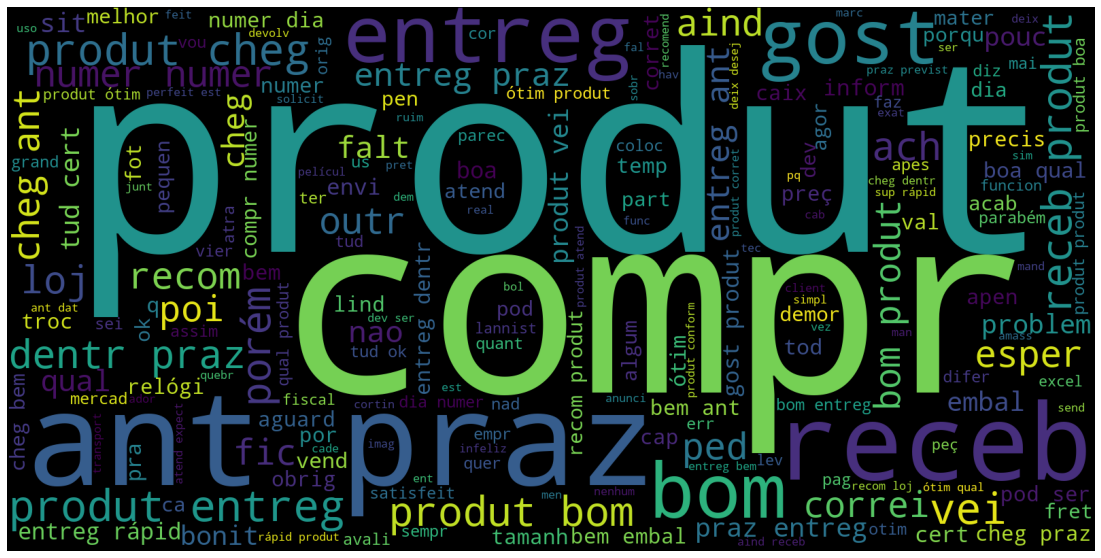

In [84]:
wordcloud = WordCloud(
                      background_color="black",
                      width=1600, height=800).generate(reviews_neutro1)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);